In [1]:
from rdflib import Graph, Namespace, RDF, Literal
from rdflib.tools.rdf2dot import rdf2dot
import sys

# Define namespaces
SCHEMA = Namespace("http://schema.org/")
EXAMPLE = Namespace("http://example.com/")

# Create a new graph
g = Graph()

# Define devices
device1 = EXAMPLE['device1']
device2 = EXAMPLE['device2']
device3 = EXAMPLE['device3']

# Define device types
laptop = SCHEMA['Laptop']
server = SCHEMA['Server']
printer = SCHEMA['Printer']

# Add devices and types to the graph
g.add((device1, RDF.type, laptop))
g.add((device2, RDF.type, server))
g.add((device3, RDF.type, printer))

# Define properties
locatedIn = EXAMPLE['located']
hasIP = EXAMPLE['hasIP']
manufacturer = SCHEMA['manufacturer']
model = SCHEMA['model']

# Add properties to the graph
g.add((device1, locatedIn, Literal('Room A')))
g.add((device2, locatedIn, Literal('Room B')))
g.add((device3, locatedIn, Literal('Room C')))
g.add((device1, hasIP, Literal('192.168.1.1')))
g.add((device2, hasIP, Literal('192.168.1.2')))
g.add((device3, hasIP, Literal('192.168.1.3')))
g.add((device1, manufacturer, Literal('Dell')))
g.add((device2, manufacturer, Literal('HP')))
g.add((device3, manufacturer, Literal('Canon')))
g.add((device1, model, Literal('Latitude')))
g.add((device2, model, Literal('Proliant')))
g.add((device3, model, Literal('Pixma')))

# Set up security controls
g.add((EXAMPLE['network'], RDF.type, SCHEMA['Network']))
g.add((EXAMPLE['network'], SCHEMA['hasPart'], device1))
g.add((EXAMPLE['network'], SCHEMA['hasPart'], device2))
g.add((EXAMPLE['network'], SCHEMA['hasPart'], device3))
g.add((EXAMPLE['network'], EXAMPLE['hasFirewall'], EXAMPLE['firewall']))
g.add((EXAMPLE['firewall'], RDF.type, EXAMPLE['Firewall']))
g.add((EXAMPLE['firewall'], EXAMPLE['hasRule'], EXAMPLE['allow_incoming_tcp']))
g.add((EXAMPLE['allow_incoming_tcp'], RDF.type, EXAMPLE['Rule']))
g.add((EXAMPLE['allow_incoming_tcp'], EXAMPLE['protocol'], Literal('TCP')))
g.add((EXAMPLE['allow_incoming_tcp'], EXAMPLE['port'], Literal(80)))

<Graph identifier=Nd8b54672ae744c22a9bdd1f877bd3206 (<class 'rdflib.graph.Graph'>)>

In [2]:
# Print the graph
print(g.serialize(format='turtle'))

@prefix ns1: <http://example.com/> .
@prefix ns2: <http://schema.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ns1:network a ns2:Network ;
    ns1:hasFirewall ns1:firewall ;
    ns2:hasPart ns1:device1,
        ns1:device2,
        ns1:device3 .

ns1:allow_incoming_tcp a ns1:Rule ;
    ns1:port 80 ;
    ns1:protocol "TCP" .

ns1:device1 a ns2:Laptop ;
    ns1:hasIP "192.168.1.1" ;
    ns1:located "Room A" ;
    ns2:manufacturer "Dell" ;
    ns2:model "Latitude" .

ns1:device2 a ns2:Server ;
    ns1:hasIP "192.168.1.2" ;
    ns1:located "Room B" ;
    ns2:manufacturer "HP" ;
    ns2:model "Proliant" .

ns1:device3 a ns2:Printer ;
    ns1:hasIP "192.168.1.3" ;
    ns1:located "Room C" ;
    ns2:manufacturer "Canon" ;
    ns2:model "Pixma" .

ns1:firewall a ns1:Firewall ;
    ns1:hasRule ns1:allow_incoming_tcp .




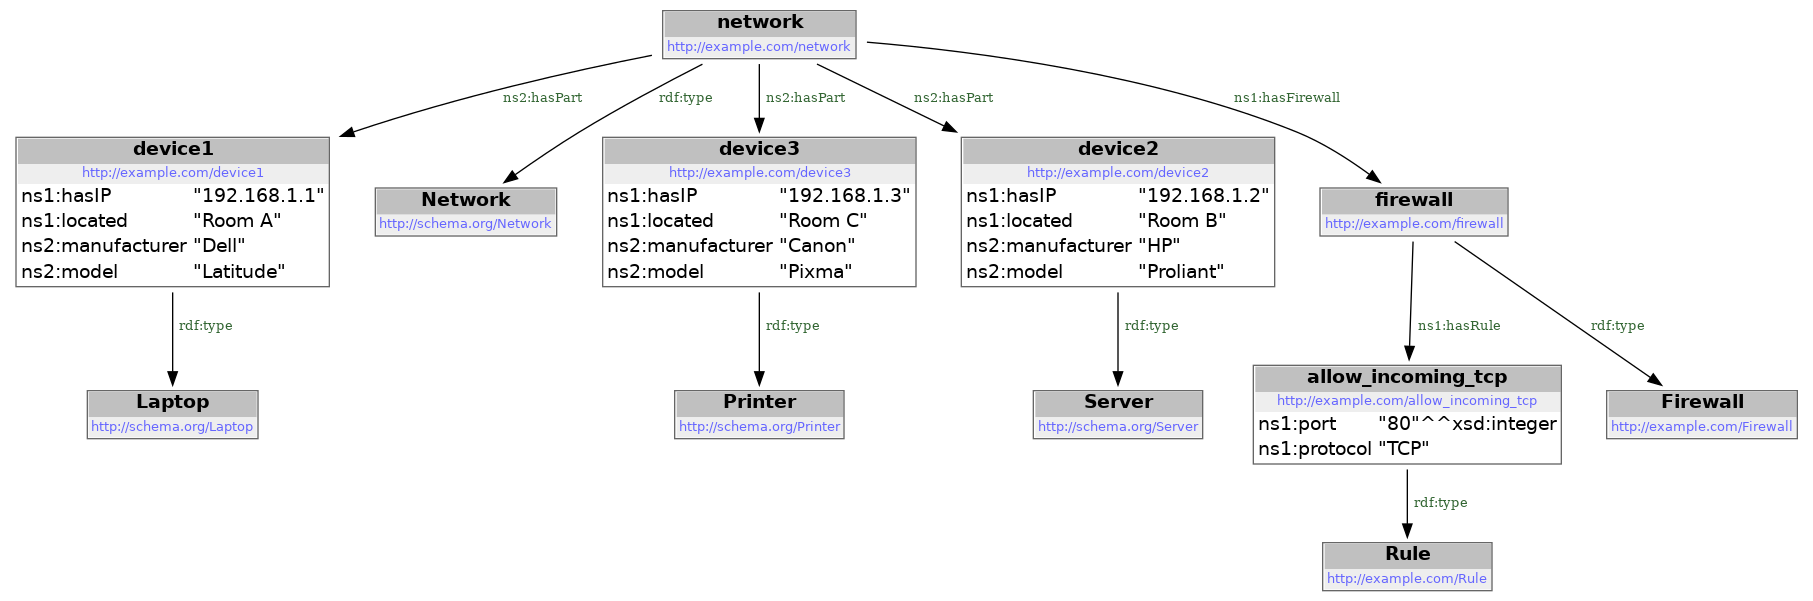

In [4]:
import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()
    display(Image(png))

visualize(g)